# Basic Cadmium usage examples 

In [1]:
using Cadmium
using ConstructiveSolidGeometry
using StaticArrays: SVector
using Plots: Shape, plot

In [21]:
left_circle  = Sphere(SVector(-0.25, 0.0), 0.5)
right_circle = Sphere(SVector(0.25, 0.0), 0.5)
nothing

In [20]:
union_circle = left_circle ∪ right_circle; 

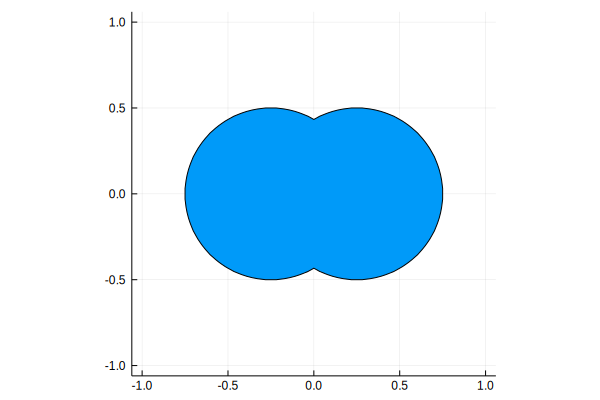

In [4]:
Plots.plot(
    Plots.Shape(union_circle, SVector(-1., -1), SVector(2., 2), 1e-3, 1e-3, 1e-1), 
    legend=false, 
    aspect_ratio=:equal, 
    xlim=[-1,1], ylim=[-1,1])

In [19]:
inter_circle = left_circle ∩ right_circle;

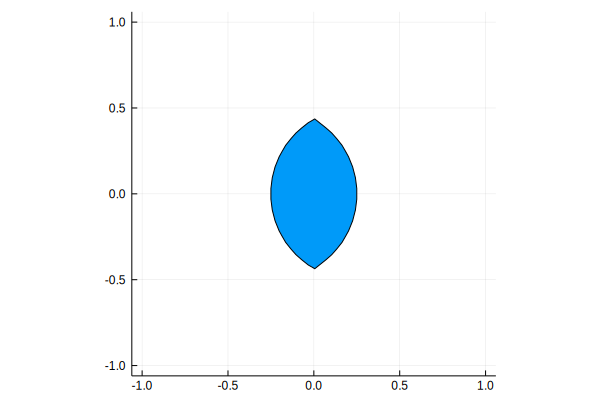

In [6]:
Plots.plot(
    Plots.Shape(inter_circle, SVector(-1., -1), SVector(2., 2), 1e-3, 1e-1, 1e-1), 
    legend=false, 
    aspect_ratio=:equal, 
    xlim=[-1,1], ylim=[-1,1])

In [18]:
left_side = Plane(SVector(-0.5,0), SVector(-1,0))
right_side = Plane(SVector(0.5,0), SVector(1,0))
top_side = Plane(SVector(0,0.5), SVector(0,1))
bottom_side = Plane(SVector(0,-0.5), SVector(0,-1))

square = left_side ∩ right_side ∩ top_side ∩ bottom_side;

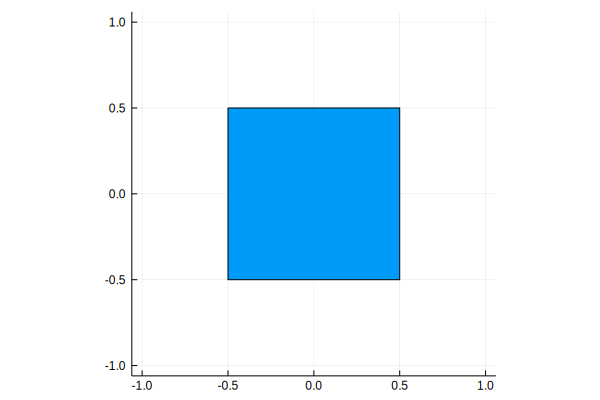

In [8]:
Plots.plot(
    Plots.Shape(square, SVector(-1., -1), SVector(2., 2), 1e-3, 1e-1, 1e-1),
    legend=false, 
    aspect_ratio=:equal, 
    xlim=[-1,1], ylim=[-1,1])

In [17]:
top_right_side    = Plane(SVector(0.5*sqrt(2),0), normalize(SVector(1,1)))
top_left_side     = Plane(SVector(0,0.5*sqrt(2)), normalize(SVector(-1,1)))
bottom_right_side = Plane(SVector(0.5*sqrt(2),0), normalize(SVector(1,-1)))
bottom_left_side  = Plane(SVector(0,-0.5*sqrt(2)), normalize(SVector(-1,-1)))

diamond = top_right_side ∩ top_left_side ∩ bottom_right_side ∩ bottom_left_side;

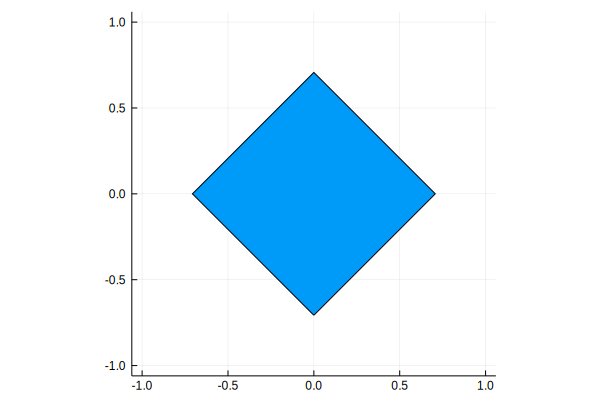

In [10]:
Plots.plot(
    Plots.Shape(diamond, SVector(-1.,-1), SVector(2.,2), 1e-3, 1e-3, 1e-1),
    legend=false,
    aspect_ratio=:equal,
    xlim=[-1,1], ylim=[-1,1]
)

`Interact` and `Reactive` are not required by `Cadmium` and so might not exist on your machine. Make sure to add them if you don't already have them.

In [11]:
using Interact
using Reactive

Interact.Options{:SelectionSlider,Int64}(1: "input" = 5 Int64 , "num_turns", 5, "5", 5, Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…), Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1"…)), Any[], Any[], true, "horizontal", true)

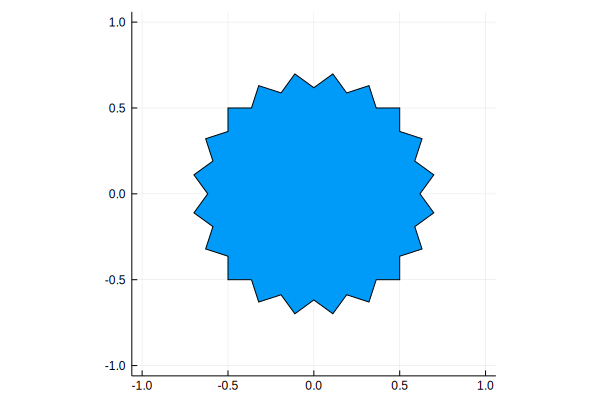

In [12]:
@manipulate for num_turns=1:10
    starburst = square
    for x=1:num_turns
        starburst= starburst ∪ rotate(square, x*π/(2num_turns))
    end
    
    Plots.plot(
        Plots.Shape(
            starburst,
            SVector(-1.,-1), 
            SVector(2.,2), 1e-3, 1e-1, 1e-1),
        legend=false,
        aspect_ratio=:equal,
        xlim=[-1,1], ylim=[-1,1]
    )
end

In [22]:
high_circle = Sphere(SVector(0.25, 0.25), 0.65)
eclipse = (square ∪ diamond) - high_circle;

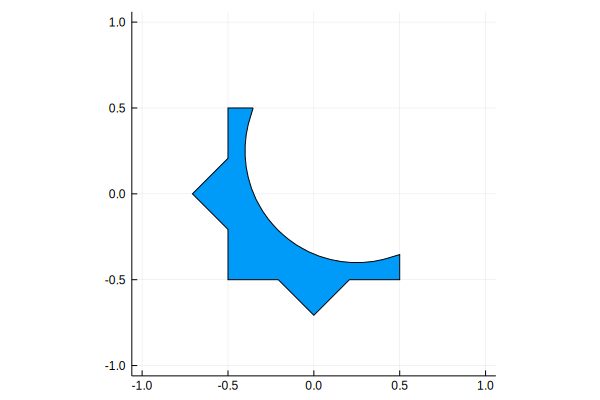

In [14]:
Plots.plot(
    Plots.Shape(eclipse, SVector(-1.,-1), SVector(2.,2), 1e-3, 1e-1),
    legend=false,
    aspect_ratio=:equal,
    xlim=[-1,1], ylim=[-1,1]
)

Interact.Options{:SelectionSlider,Float64}(5: "input-2" = 0.0 Float64 , "r", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict("-3.141592653589793"=>-3.14159,"-3.015928947446201"=>-3.01593,"-2.8902652413026098"=>-2.89027,"-2.764601535159018"=>-2.7646,"-2.6389378290154264"=>-2.63894,"-2.5132741228718345"=>-2.51327,"-2.3876104167282426"=>-2.38761,"-2.261946710584651"=>-2.26195,"-2.1362830044410592"=>-2.13628,"-2.0106192982974678"=>-2.01062…), Dict(-3.01593=>"-3.015928947446201",2.89027=>"2.8902652413026098",1.75929=>"1.7592918860102842",2.63894=>"2.6389378290154264",0.251327=>"0.25132741228718347",-2.51327=>"-2.5132741228718345",1.25664=>"1.2566370614359172",-3.14159=>"-3.141592653589793",1.3823=>"1.382300767579509",2.7646=>"2.764601535159018"…)), Any[], Any[], true, "horizontal", true)

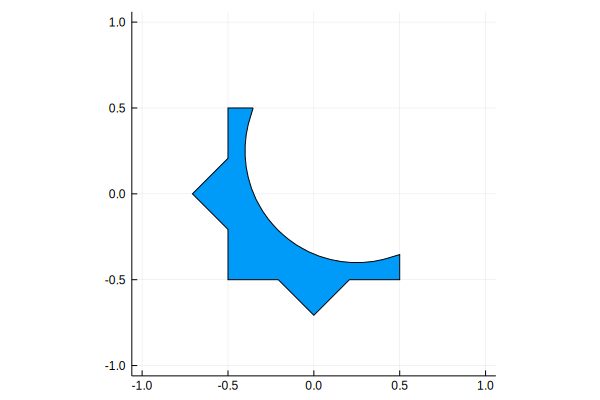

In [15]:
@manipulate for r = linspace(-π,π,51)
    Plots.plot(
        Plots.Shape(rotate(eclipse, r),
        SVector(-1.,-1), SVector(2.,2), 1e-3, 1e-1, 1e-1),
        legend=false,
        aspect_ratio=:equal,
        xlim=[-1,1], ylim=[-1,1]
    )
end

Interact.Options{:SelectionSlider,Float64}(9: "input-3" = 0.0 Float64 , "x", 0.0, "0.0", 6, Interact.OptionDict(DataStructures.OrderedDict("-0.25"=>-0.25,"-0.2"=>-0.2,"-0.15"=>-0.15,"-0.1"=>-0.1,"-0.05"=>-0.05,"0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2…), Dict(-0.2=>"-0.2",0.25=>"0.25",0.0=>"0.0",0.15=>"0.15",0.2=>"0.2",-0.1=>"-0.1",-0.25=>"-0.25",0.05=>"0.05",-0.05=>"-0.05",-0.15=>"-0.15"…)), Any[], Any[], true, "horizontal", true)

Interact.Options{:SelectionSlider,Float64}(11: "input-4" = 0.0 Float64 , "y", 0.0, "0.0", 6, Interact.OptionDict(DataStructures.OrderedDict("-0.25"=>-0.25,"-0.2"=>-0.2,"-0.15"=>-0.15,"-0.1"=>-0.1,"-0.05"=>-0.05,"0.0"=>0.0,"0.05"=>0.05,"0.1"=>0.1,"0.15"=>0.15,"0.2"=>0.2…), Dict(-0.2=>"-0.2",0.25=>"0.25",0.0=>"0.0",0.15=>"0.15",0.2=>"0.2",-0.1=>"-0.1",-0.25=>"-0.25",0.05=>"0.05",-0.05=>"-0.05",-0.15=>"-0.15"…)), Any[], Any[], true, "horizontal", true)

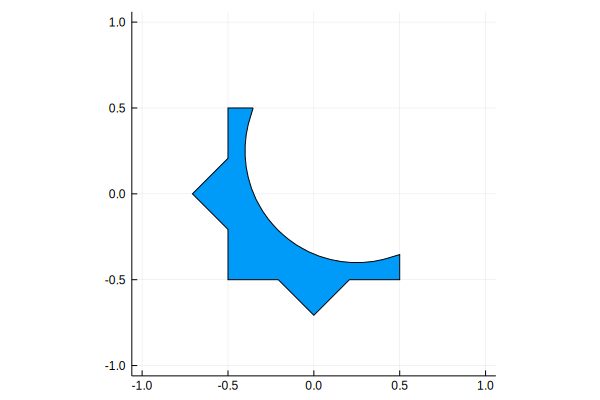

In [16]:
@manipulate for x=-0.25:0.05:0.25, y=-0.25:0.05:0.25
        Plots.plot(
            Plots.Shape(translate(eclipse, SVector(x,y)),
            SVector(-2.,-2), SVector(4.,4), 1e-3, 1e-3),
            legend=false,
            aspect_ratio=:equal,
            xlim=[-1,1], ylim=[-1,1]
        )
end